d:\github ML REPO\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting Training...
Training Completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.5000 - loss: 1.0460
Test Accuracy: 50.00%


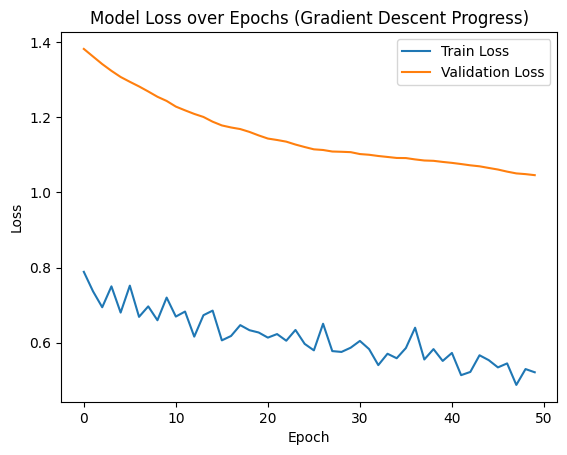

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('student_data_40_records.csv')
X = df.drop('Target_Pass', axis=1).values
y = df['Target_Pass'].values

# 2. Preprocessing (Crucial for Deep Learning)
# Neural Networks require scaled data (similar ranges) for better gradient descent
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Build the ANN Architecture
model = Sequential()

# Input Layer + 1st Hidden Layer
# Topic: Weight Initialization (Video 29) -> kernel_initializer='he_uniform' is good for ReLU
# Topic: Activation Function (Video 12) -> activation='relu'
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='relu', input_dim=X_train.shape[1]))

# Dropout Layer
# Topic: Dropout Layers (Video 30) -> Prevents Overfitting by randomly disabling 20% of neurons
model.add(Dropout(0.2))

# 2nd Hidden Layer
model.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))

# Output Layer
# Topic: Sigmoid (Video 9) -> Used here because output is binary (0 or 1)
model.add(Dense(units=1, activation='sigmoid'))

# 4. Compilation
# Topic: Optimizers (Video 27) -> Adam is generally the best starting point
# Topic: Loss Functions (Video 19) -> binary_crossentropy for classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Training (Forward & Back Propagation)
# verbose=1 shows the progress bar
print("Starting Training...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=0)
print("Training Completed.")

# 6. Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot Loss Curve (To see if Gradient Descent worked)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs (Gradient Descent Progress)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()